In [ ]:
#Gelişmiş fonksiyonel keşifçi veri analizinin amacı, elimize büyük-küçük boyutlu veri geldiğinde bu verileri ölçeklenebilir yani fonksiyonel tarzda işleyebilmeyi, hızlı bir şekilde veri ile ilgili iç görüler edinmeyi amaçlamaktadır.

In [7]:
### 1) GENEL RESİM ### Bu bölümde veri setimiz hakkında genel bilgi edinmeyi amaçlarız.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from streamlit import dataframe

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
df.shape  # satir ve sütun bilgileri

(891, 15)

In [9]:
df.info()  # veritipi, sütun bigileri null değerleri gibi ayrıntılı bilgileri verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
df.index  # index bilgileri (baş, bitiş, adım)

RangeIndex(start=0, stop=891, step=1)

In [12]:
df.describe().T  # Sayısal sütunların istatiksel bilgileri (.T ise verileri transpoze(satırlar sütun, sütunlar satır olur.))

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
df.isnull().sum()  # boş değerler toplamı

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
def check_df(dataframe, head=5):# Yukarıda yaptığımız işlemler tek bir fonksiyonda toparlandı.
    print("############################## Shape ##############################")
    print(dataframe.shape)
    print("############################## Types ##############################")
    print(dataframe.dtypes)
    print("############################## Head ##############################")
    print(dataframe.head(head))
    print("############################## Tail ##############################")
    print(dataframe.tail(head))
    print("############################## NA ##############################")
    print(dataframe.isnull().sum())
    print("############################## Quantiles ##############################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

############################## Shape ##############################
(891, 15)
############################## Types ##############################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
############################## Head ##############################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0    

In [24]:
df=sns.load_dataset("flights")
check_df(df)# farklı bir veri setinde de ilk bakışı fonksiyonel bir şekilde gerçekleştirmiş olduk.

############################## Shape ##############################
(144, 3)
############################## Types ##############################
year             int64
month         category
passengers       int64
dtype: object
############################## Head ##############################
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
############################## Tail ##############################
     year month  passengers
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432
############################## NA ##############################
year          0
month         0
passengers    0
dtype: int64
############################## Quantiles ##############################
            count         mean         std     min      0%      5%     50%      95%      99%    100%     max
year   

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
################################################


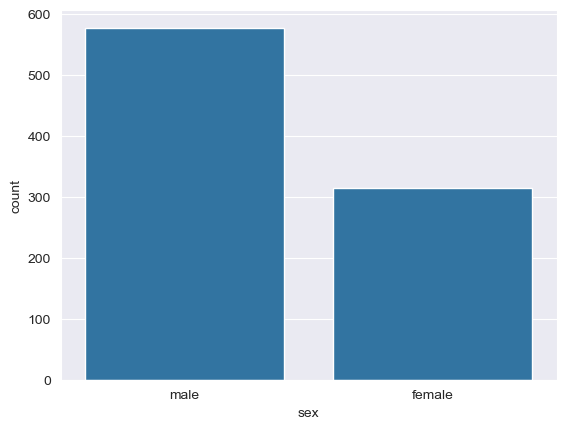

          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
################################################


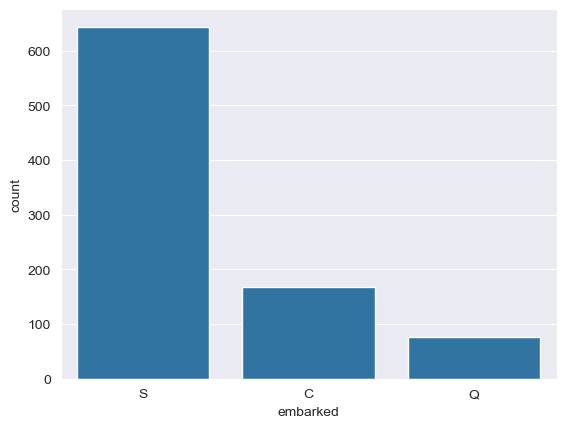

        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
################################################


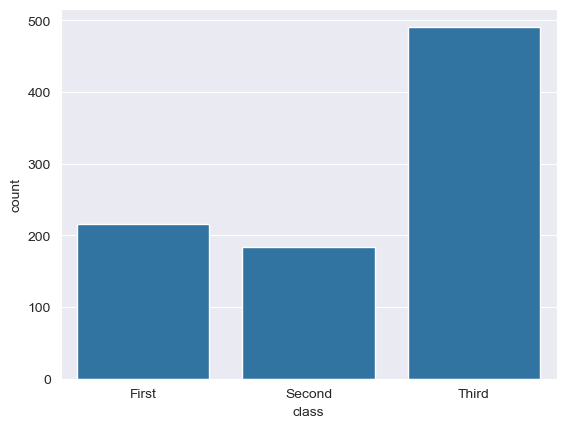

       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
################################################


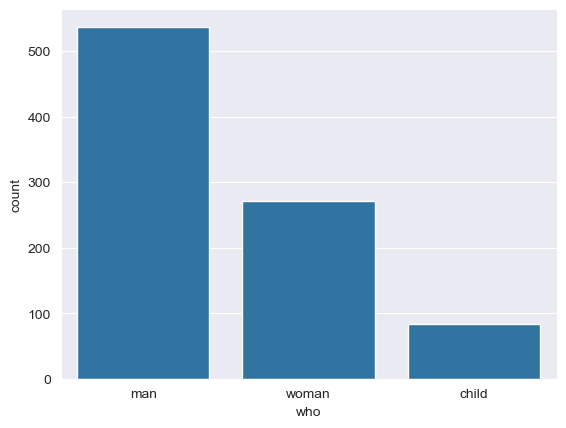

            adult_male     Ratio
adult_male                      
True               537  60.26936
False              354  39.73064
################################################


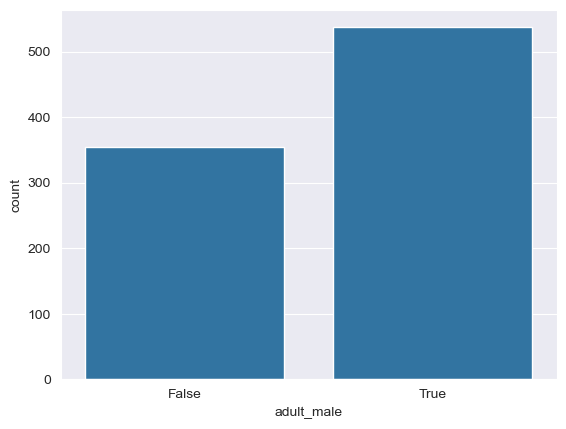

      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G        4  0.448934
################################################


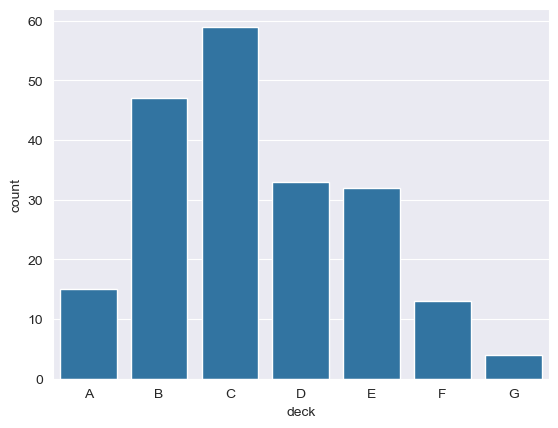

             embark_town      Ratio
embark_town                        
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
################################################


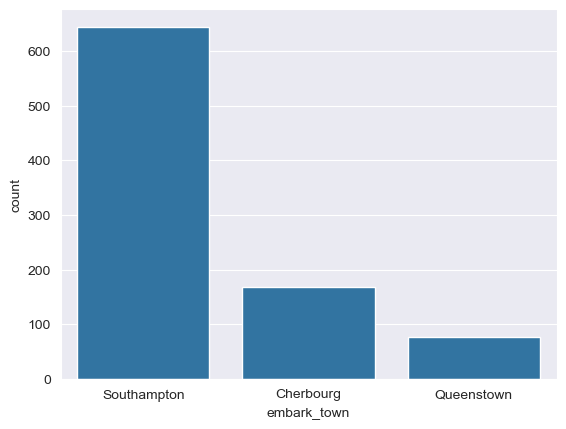

       alive      Ratio
alive                  
no       549  61.616162
yes      342  38.383838
################################################


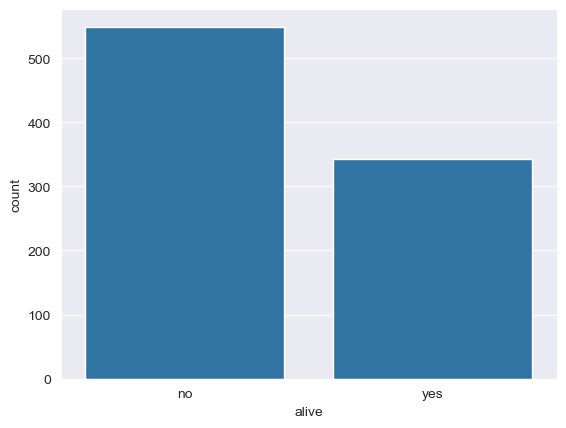

       alone     Ratio
alone                 
True     537  60.26936
False    354  39.73064
################################################


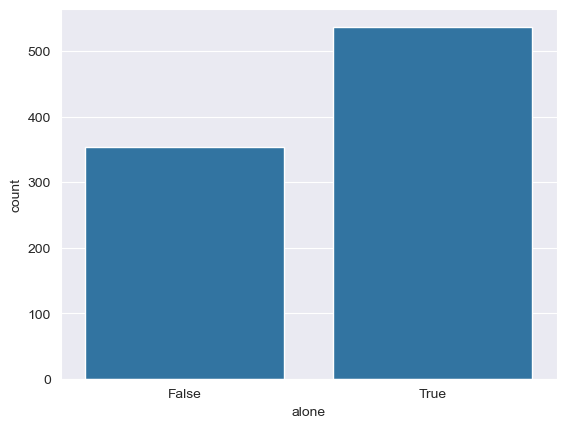

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838
################################################


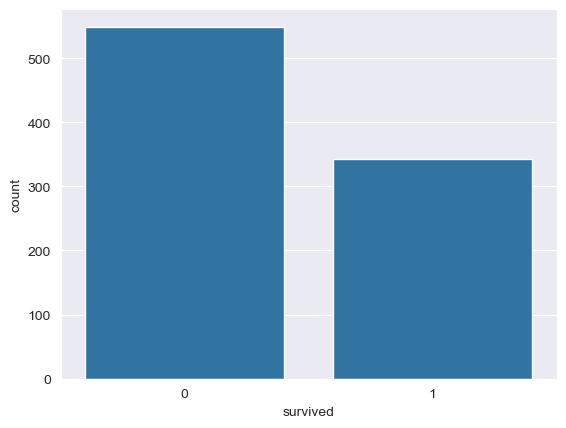

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954
################################################


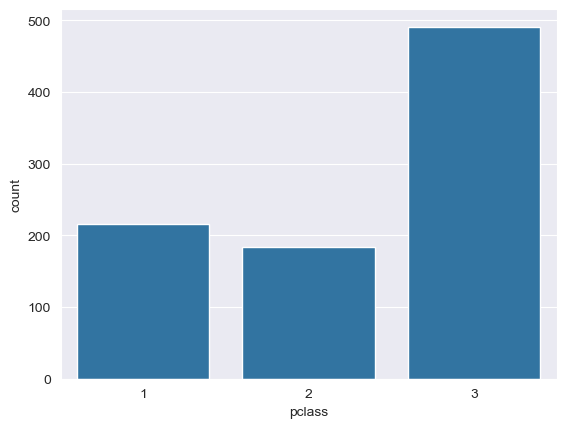

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167
################################################


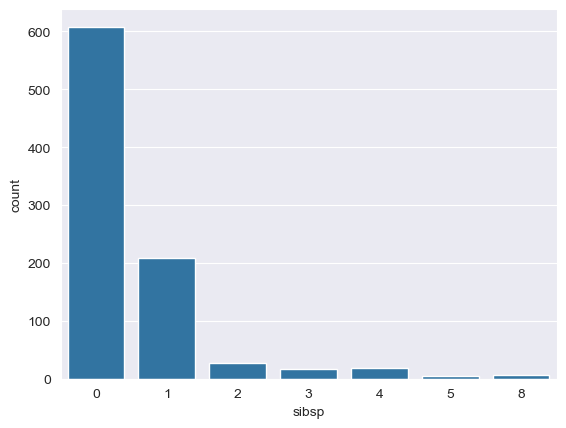

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233
################################################


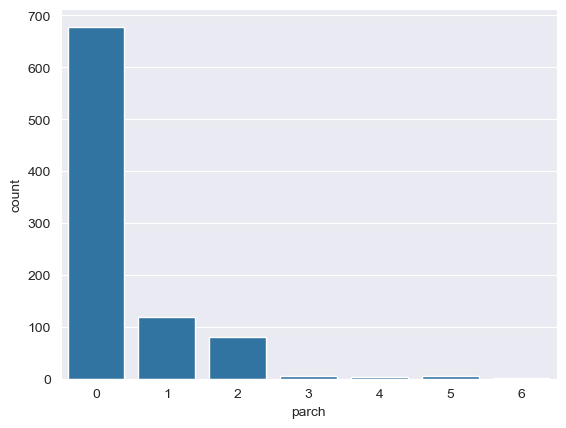

In [58]:
### 2) KATEGORİK DEĞİŞKEN ANALİZİ (ANALYSİS OF CATEGORİCAL VARİABLES) ###
df=sns.load_dataset("titanic")
df["embark_town"].value_counts()
df["sex"].unique() # kategorik değişkenleri
df["class"].nunique() # kategorik değişken sayısı

# öyle birşey yapmalıyız ki veri seti içerisinden otomatik olarak kategorik değişkenleri seçilsin.

cat_cols=[col for col in df.columns if str(df[col].dtypes) in ["object", "category", "bool"]]

num_bat_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]] #numerik ama kategorik gibi davranan?

cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["object", "category"]]

cat_cols= cat_cols+num_bat_cat

cat_cols = [col for col in cat_cols if col not in cat_but_car]

df[cat_cols].nunique()

[col for col in df.columns if col not in cat_cols] # kategorik olmayan değişkenler


def cat_summary(dataframe, col_name, plot=False):# Fonksiyonlu hali
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("################################################")
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

#cat_summary(df, "sex")

for col in cat_cols:
    cat_summary(df, col, True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
100%      80.000000
max       80.000000
Name: age, dtype: float64


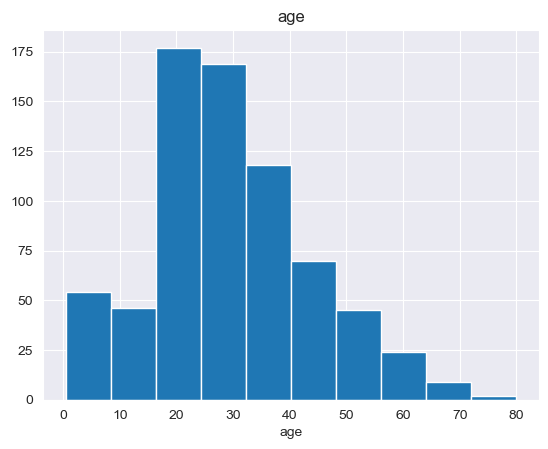

###### AGE ######
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
100%     512.329200
max      512.329200
Name: fare, dtype: float64


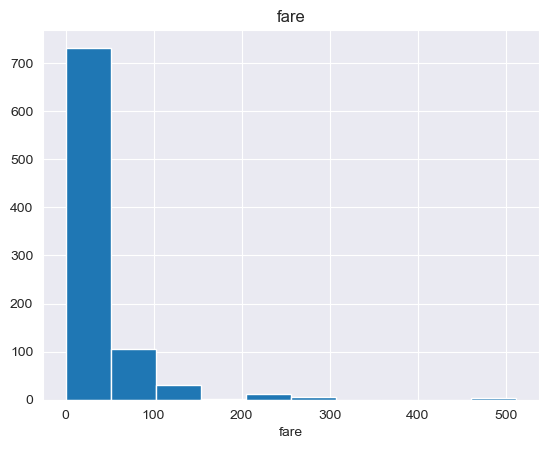

###### FARE ######


In [37]:
### 3) SAYISAL DEĞİŞKEN ANALİZİ (ANALYSIS OF NUMERICAL VARIABLES) ###

cat_cols=[col for col in df.columns if str(df[col].dtypes) in ["object", "category", "bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]] #numerik ama kategorik gibi davranan?
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["object", "category"]]
cat_cols= cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]



df[["age","fare"]].describe().T

num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]
num_cols = [col for col in df.columns if col not in cat_cols]

def num_summary(dataframe, numeric_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]
    print(dataframe[numeric_col].describe(quantiles).T)
    
    if plot:
        dataframe[numeric_col].hist()
        plt.xlabel(numeric_col)
        plt.title(numeric_col)
        plt.show(block=True)
for col in num_cols:
    num_summary(df, col, plot=True)
    print(f"###### {col.upper()} ######")

In [41]:
### Değişkenlerin Yakalanması ve İşlemlerin Genelleştirilmesi (2 ve 3. adım tek fonsiyonda.)

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """ 
    kategorik değişkenler listesini, numerik değişkenler listesini ve kategorik ama kardinal değişkenler listesini getirir.
    
    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için eşik sınıf değeri
    car_th: int, float  
            kategorik fakat kardinal olan değişkenler için eşik sınıf değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişkenler listesi
        
    Notes
    -------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde
    Return olan 3 liste toplamı değişken sayosona eşittir.
    """
    cat_cols=[col for col in df.columns if str(df[col].dtypes) in ["object", "category", "bool"]]
    num_bat_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes in ["int64", "float64"]] #numerik ama kategorik gibi davranan?
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and str(df[col].dtypes) in ["object", "category"]]
    cat_cols= cat_cols+num_bat_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]
    num_cols = [col for col in df.columns if col not in cat_cols]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"cat_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("################################################")
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
        
for col in cat_cols:
    cat_summary(df, col, True)


def num_summary(dataframe, numeric_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]
    print(dataframe[numeric_col].describe(quantiles).T)
    
    if plot:
        dataframe[numeric_col].hist()
        plt.xlabel(numeric_col)
        plt.title(numeric_col)
        plt.show(block=True)
        
for col in num_cols:
    num_summary(df, col, plot=True)
    print(f"###### {col.upper()} ######")

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
cat_but_cat: 4


In [55]:
# 4) Hedef değişkenin kategorik değişkenler ile analizi
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    
target_summary_with_cat(df, "survived", "sex")# hedef değişkenimiz olan "survived" üzerinde cinsiyetin etkisini gözlemledik.
target_summary_with_cat(df, "survived", "embarked")# hedef değişkenimiz olan "survived" üzerinde yolculuk sınıfının etkisini gözlemledik.

for col in cat_cols:
    target_summary_with_cat(df, "survived", col)# tüm kategorik değişkenlerin hayatta kalma üzerindeki etkisini inceledik.


        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363
       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458
      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
       TARGET_MEAN
alive             
no             0.0
yes            1.0
          TARGET_MEAN
survived             
0                 

In [57]:
# Hedef değişkenin sayısal değişkenler ile analizi

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")
    
for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690

               fare
survived           
0         22.117887
1         48.395408

          adult_male
survived            
0           0.817851
1           0.257310

             alone
survived          
0         0.681239
1         0.476608



In [62]:
### 5. Korelasyon Analizi (Analysis of Correlation) ###
# Korelasyon: iki değişken arasındaki ilişki ölçütüdür(iki değişkenin benzerliği olarakda düşünülebilir.). -1(negatif ilişki) ile 1(pozitif ilişki) arasında değer alır. -1, 1 lere yaklaştıkça korelasyon güçlenir.
# Amaç : bir veri setini, bunun ısı haritası aracılığıyla korelasyonuna bakmak ve daha sonra korelasyonu yüksek olan değişkenlerden bazılarını dışarıda bırakabilmektir.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = pd.read_csv("dataset/breast_cancer.csv")# meme kanseri veri seti
df = df.iloc[:, 1:-1]# ilk sütun ve son sütunu çıkardık
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


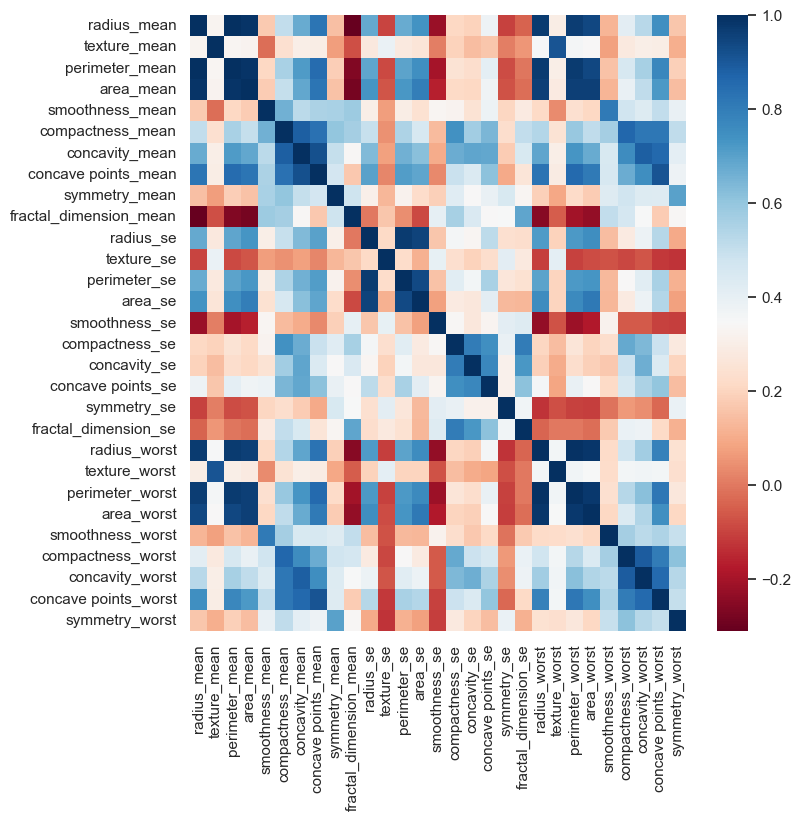

In [70]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]# kor analiz için sadece sayısal sütunları seçtik

corr = df[num_cols].corr() # Korelasyona bakmak için corr fonksiyonu kullanılır.

sns.set(rc={"figure.figsize": (8, 8)})# harita boyutu
sns.heatmap(corr, cmap="RdBu")# korelasyon ısı haritası
plt.show()

In [79]:
# Yüksek Korelasyonlu değişkenlerin silinmesi

df[num_cols] = df[num_cols].fillna(0)# Eksik değerleri kontrol ve doldurma

cor_matrix = df[num_cols].corr().abs()# mutlak değerini aldık

upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)) # Üst üçgen matris seçimi

drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > 0.90)] #kol. değeri 0.90 dan büyük olanları seçtik
print(drop_list)

df.drop(drop_list, axis=1, inplace=True) # kalıcı olarak sildik.

['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [84]:
# Korelasyon fonksiyonu

def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    dataframe[num_cols] = dataframe[num_cols].fillna(0)# Eksik değerleri kontrol ve doldurma
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)) # Üst üçgen matris seçimi
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > 0.90)] #kol. değeri 0.90 dan büyük olanları seçtik
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize": (8, 8)})
        sns.heatmap(corr_matrix, cmap="RdBu")
        plt.show()
    return drop_list
high_correlated_cols(df)

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

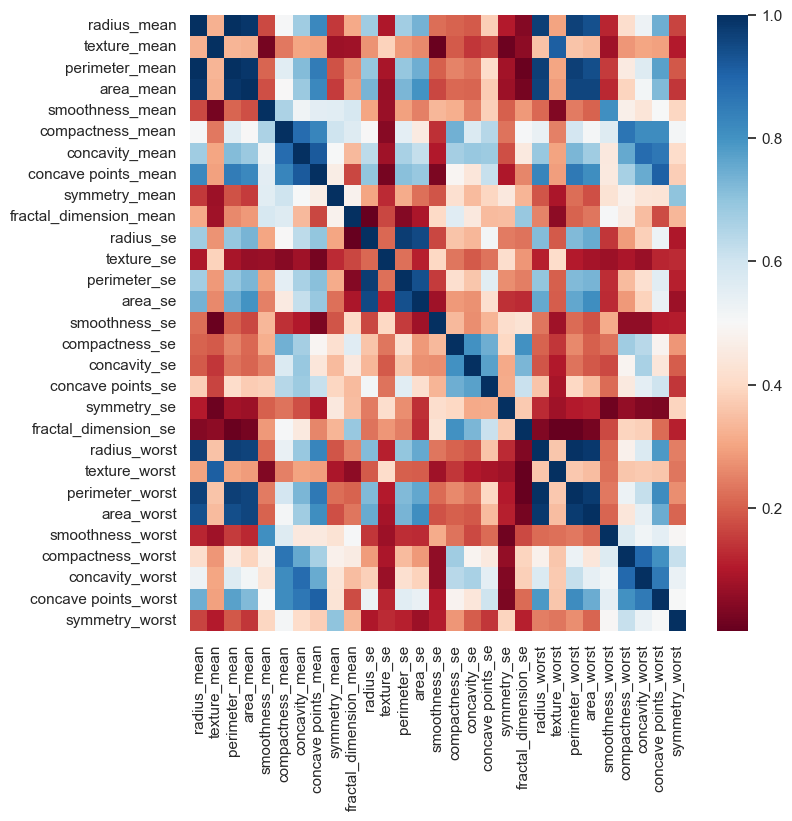

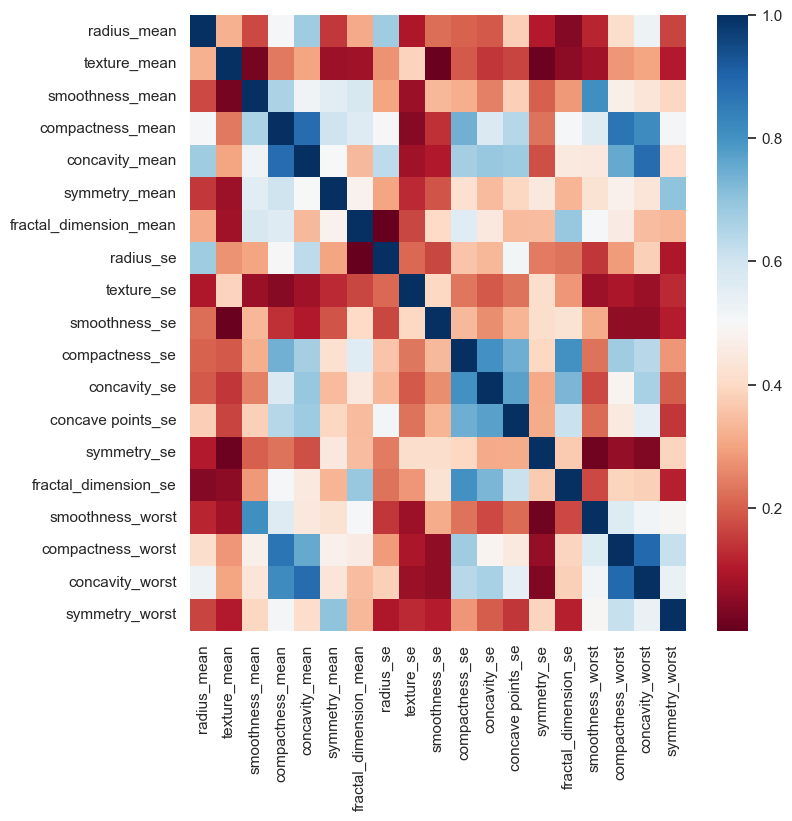

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [85]:
drop_list=high_correlated_cols(df, plot=True)
df.drop(drop_list, axis=1, inplace=True)
high_correlated_cols(df, plot=True)
#KORELASYONU YÜKSEK OLAN DEĞERLERİ SİLDİKTEN SONRA ISI HARİTAMIZDA KOYU MAVİ VE KOYU KIRMIZI RENKLİ PİKSELLER GİTTİ.